Import necessary libraries

In [2]:
import re  # Import the regular expressions module for pattern matching and text processing
import matplotlib.pyplot as plt  # For plotting data
import seaborn as sns  # For enhanced data visualizations

# Import libraries for machine learning models and evaluation
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For scaling numerical data and encoding categorical data
from sklearn.linear_model import LinearRegression, ElasticNet  # For linear Regression
from sklearn.tree import DecisionTreeRegressor  # For Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor  # For Random Forest Regression
from sklearn.svm import SVR  # For Support Vector Regression 
#import xgboost as xgb # For XGBoost Regression
from sklearn.model_selection import cross_validate  # To perform cross-validation
from sklearn.metrics import mean_squared_error, r2_score, make_scorer  # For model evaluation metrics
from sklearn.model_selection import GridSearchCV   # For hyperparameter tuning


In [3]:
import pandas as pd
import numpy as np

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
filepath = r"C:\Users\Special User\Downloads\5G_energy_consumption_dataset.csv"
df = pd.read_csv(filepath)

In [6]:
df.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


OBSERVATIONS There are 92629 entries, 6 columns and no missing values Time has the data type object but should be converted to the right data type

In [7]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d %H%M%S')
print(df['Time'].dtypes)

datetime64[ns]


In [8]:
df['BS'].value_counts()

BS
B_583     130
B_261     128
B_728     128
B_669     128
B_512     126
         ... 
B_1018     16
B_921      14
B_905      13
B_854       1
B_835       1
Name: count, Length: 923, dtype: int64

In [9]:
df['ESMODE'].value_counts()

ESMODE
0.000000    87475
2.000000     1299
1.999722      226
0.002500      134
0.000556      122
            ...  
0.378611        1
1.805833        1
1.467778        1
0.317500        1
0.983333        1
Name: count, Length: 1713, dtype: int64

OBSERVATIONS Energy is likely skewed, as the maximum value (100.0) is far from the mean (28.14). TXPower have most values clustered around the mean, with minimal variation. ESMODE = 0.0 accounts for 87,475 out of 92,629 entries (~94.4%). This indicates that the majority of the time, the energy-saving mode is inactive. Might binarize it into active(1), inactive(0), if it has correlation with energy or dispose of it in my model.

In [10]:
df.describe()

,Time,Energy,load,ESMODE,TXpower
count,92629,92629.000000,92629.000000,92629.000000,92629.000000
mean,2023-01-04 00:31:21.324423424,28.138997,0.244705,0.081361,6.765427
min,2023-01-01 01:00:00,0.747384,0.000000,0.000000,5.381166
25%,2023-01-02 11:00:00,18.236173,0.057370,0.000000,6.427504
50%,2023-01-03 20:00:00,24.065770,0.165550,0.000000,6.875934
75%,2023-01-05 14:00:00,35.724963,0.363766,0.000000,6.875934
max,2023-01-08 00:00:00,100.000000,0.993957,4.000000,8.375336
std,NaN,13.934645,0.234677,0.382317,0.309929


In [11]:
df.describe(include ='object')

,BS
count,92629
unique,923
top,B_583
freq,130


PROFILE REPORT FOR THE DATASET

In [12]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Energy Consumption Prifile Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

## Exploratory Data Analysis (EDA)
This section includes visualizations and insights to understand the dataset.

### Univariate Analysis
Univariate analysis involves analyzing individual features one at a time. This helps to understand the distribution, central tendency, and variability of each feature.

In [11]:
# Filter out numerical features and store in 'numerical_features'.
numerical_features = df.select_dtypes(include='number').columns
len(numerical_features)

4

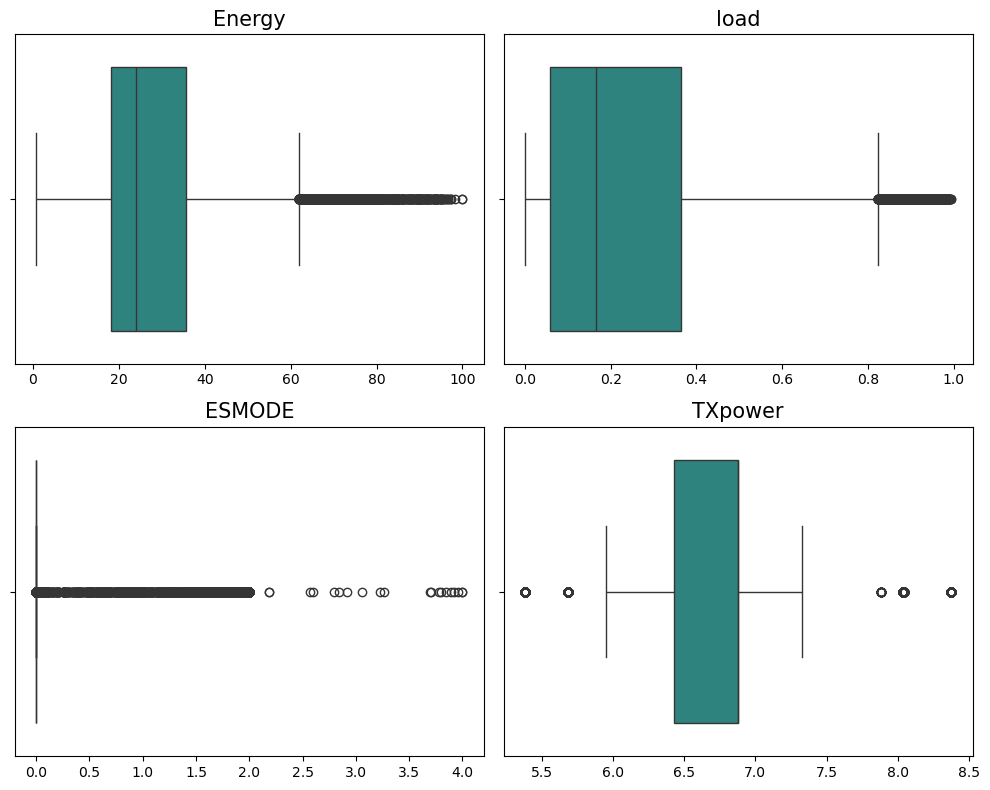

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features
numerical_features = ['Energy', 'load', 'ESMODE', 'TXpower']

# Set the figure size and the number of rows/columns for subplots
plt.figure(figsize=(10, 8))

# Loop through each numerical feature to create subplots
for i in range(len(numerical_features)):
    plt.subplot(2, 2, i + 1)  # Create a grid of 2 rows and 2 columns
    sns.boxplot(x=df[numerical_features[i]], palette='viridis')  # Plot a boxplot for each feature
    plt.title(numerical_features[i], fontsize=15)  # Set a title for each subplot
    plt.xlabel('')  # Remove x-axis labels for better clarity
    plt.tight_layout()  # Adjust the layout to prevent overlap

# Display the plots
plt.show()


In [13]:
categorical_features = df.select_dtypes(include='object').columns
len(categorical_features)

1

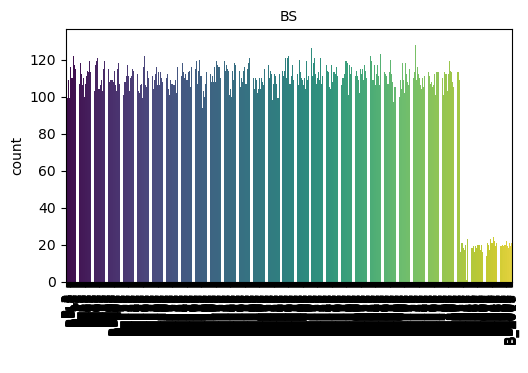

In [17]:
plt.figure(figsize=(10, 10))
for i in range(0, len(categorical_features)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x = df[categorical_features[i]], palette = 'viridis')
    plt.title(categorical_features[i], fontsize = 10)
    plt.xlabel(' ')
    plt.xticks(rotation=90)
    plt.tight_layout()
plt.show()

Visualizing Energy Distribution

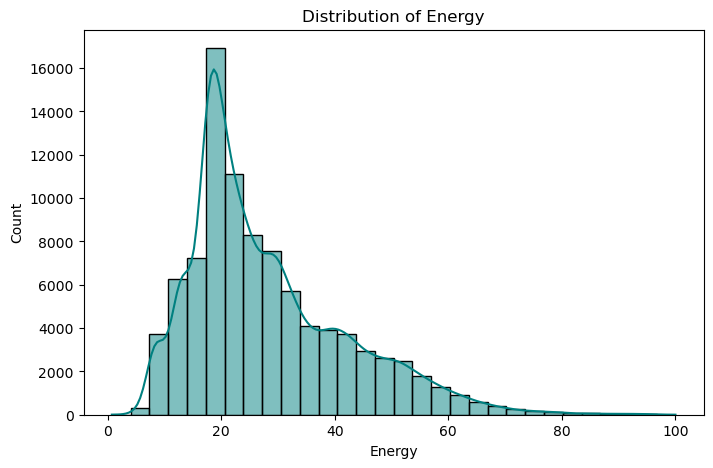

In [18]:
 #Set the figure size to 8x5 inches for better visibility
plt.figure(figsize=(8, 5))

# Create a histogram to visualize the distribution of laptop prices
# 'bins=30' ensures the data is divided into 30 intervals
# 'kde=True' adds a Kernel Density Estimate (KDE) line to show the smooth probability distribution
sns.histplot(df["Energy"], bins=30, kde=True, color="teal")

# Set the title of the plot
plt.title("Distribution of Energy")

# Display the plot
plt.show()

### Bi-Variate Analysis
Bi-variate analysis looks at 2 different features to identify any possible relationship or distinctive patterns between the 2 features. We are going to compare all the features with the target variable `Energy`

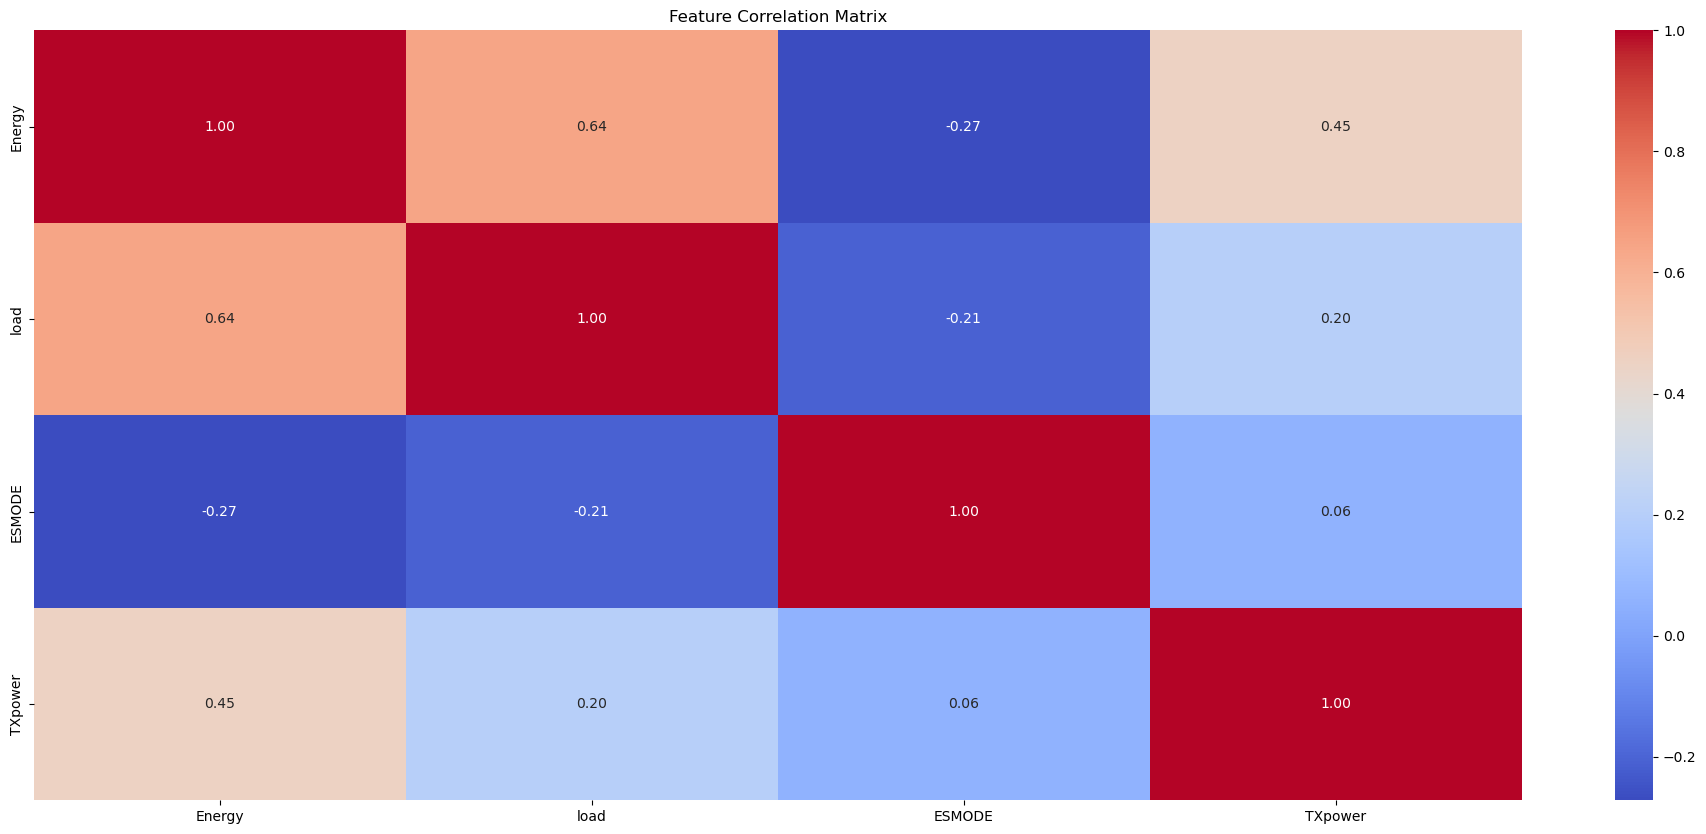

In [19]:
## Correlation matrix of numerical features
plt.figure(figsize=(24, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

CATEGORICAL COLUMN VS ENERGY

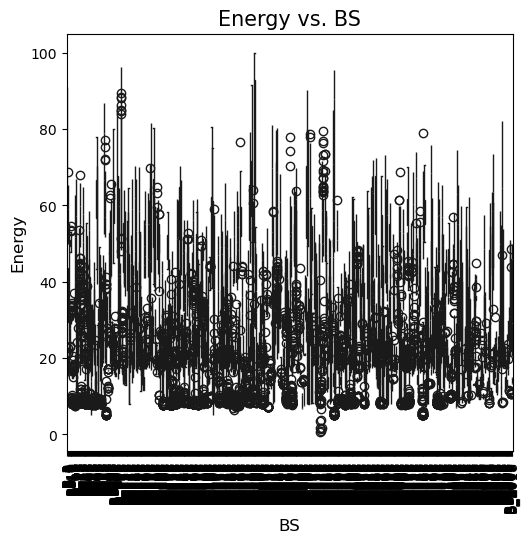

In [20]:
plt.figure(figsize=(10, 15))  # Reduce figure size for better visibility
for i in range(0, len(categorical_features)):
    plt.subplot(3, 2, i+1)  # Adjust grid to 2x3 (or whatever fits best)
    sns.boxplot(x=categorical_features[i], y='Energy', data=df, palette='viridis')
    plt.title(f'Energy vs. {categorical_features[i]}', fontsize=15)
    plt.xlabel(categorical_features[i], fontsize=12)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.ylabel('Energy', fontsize=12)  # Add y-axis label for clarity

# Apply tight_layout after all subplots are created
plt.tight_layout()
plt.show()

MODELLING
Here I will transform my energy to log as a result of the outliers present and us one hot encoding for esmode and encoding for bs

In [14]:
# List of categorical columns to be encoded
categorical_cols = ["BS"]

# Apply one-hot encoding to the categorical columns
# - pd.get_dummies creates binary columns for each category in the categorical columns
df = pd.get_dummies(df, columns=categorical_cols)

# Set option to display all the columns
pd.set_option("display.max_columns", None)


In [15]:
# Apply the log transformation
df["Energy"] = np.log(df["Energy"])

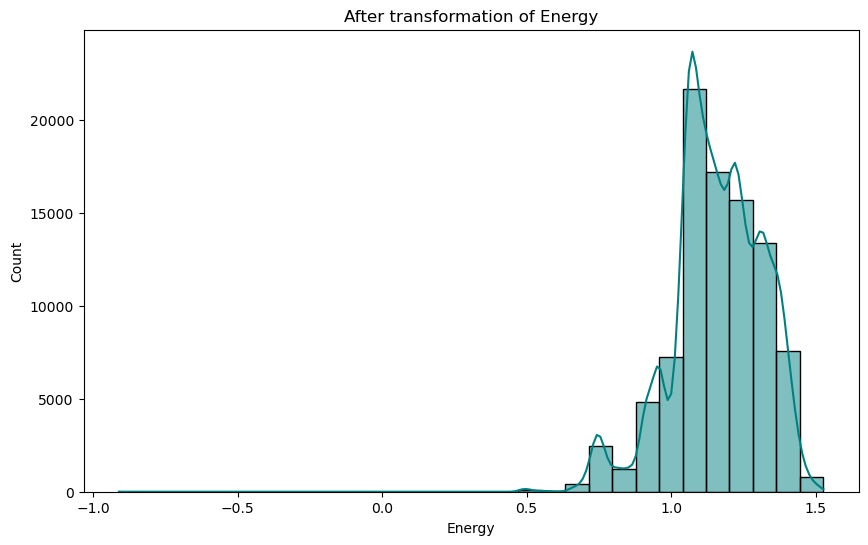

In [23]:
plt.figure(figsize=(10,6))
plt.title("After transformation of Energy")
sns.histplot(np.log(df["Energy"]), bins=30, kde=True, color="teal") 
# Apply the natural logarithm to energy
plt.show()

In [16]:
df['ESMODE_binary'] = (df['ESMODE'] > 0).astype(int)


#### Feature Selection

In [17]:
X = df.drop(columns=["Energy", "Time"])  # Features
y = df["Energy"]  # Target variable
# Split into Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scaling the data
- Scaling ensures that each feature contributes equally to the distance calculations or the optimization process. 
- We'll use **Standardization** here.  Standardization transforms the features to have a mean of 0 and a standard deviation of 1. This is useful when the features have different units or scales.

In [18]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

#### 1. Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

# Initialize the model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_linear = linear_reg.predict(X_test_scaled)

# Evaluate the model
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression:\n RMSE: {rmse_linear:.4f}\n R²: {r2_linear:.4f}\n")

Linear Regression:
 RMSE: 0.1294
 R²: 0.9285



#### 2. Ridge Regression

In [28]:
from sklearn.linear_model import Ridge

# Initialize the model
ridge_reg = Ridge(alpha=1.0)

# Fit the model to the training data
ridge_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_ridge = ridge_reg.predict(X_test_scaled)

# Evaluate the model
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression:\n RMSE: {rmse_ridge:.4f}\n R²: {r2_ridge:.4f}\n")

Ridge Regression:
 RMSE: 0.1294
 R²: 0.9285

